# Proyecto Final

- **Nombre:** Renata Córdova Meneses
- **Rol USM:** 202010522-7

## Introducción

La finalidad de este proyecto es enfrentar a los estudiantes a
problemas de Machine Learning con todas las etapas (típicas) que eso implica,
basándose en cada uno de los módulos aprendidos a lo largo del curso, dando pie
a la investigación y a la solución de problemas operacionales del mundo real.

## Descripción del Proyecto

Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos
para resolver un misterio cósmico. Hemos recibido una
transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de
pasajeros interestelar lanzado hace un mes.
Con casi 13.000 pasajeros a bordo, la nave emprendió
su viaje inaugural transportando emigrantes de nuestro
sistema solar a tres exoplanetas recientemente habitables
que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino,
el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una
anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente,
tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció
intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width = "400" align="center"/>

## Evaluación

El proyecto final consta de dos parte:

* **Parte Técnica**: Desarrollar una solución *end to end* del proyecto utilizando Jupyter Notebook.
* **Presentación de Resultados**: Realizar una presentación de 10-20 minutos de sus hallazgos.  


### Parte Técnica

La Parte técnica debe cumplir con la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Tendrá una mejor puntación si también incorpora modelos de redes neuronales. Se deja un [tutorial de tensorflow](https://www.tensorflow.org/tutorials?hl=es-419) a modo de ejemplo.

La solución debe alojarse en su **Portafolio Personal** del curso (`.ipynb`).

### Presentación de Resultados

* La presentación consta de 10-20 minutos.
* Debe grabar su presentación y subirla al siguiente [espacio de trabajo](https://drive.google.com/drive/folders/1QujMqrszub2KjS4mxFbkZGhd_AwvlQtb?usp=sharing).
* Utilizar diapositivas con [BEAMER](https://www.dropbox.com/s/ol38qwzacgwzud7/Beamer.rar). Se deja el siguiente el siguiente [tutorial](https://www.youtube.com/watch?v=rx7wwtmFlD8&t=792s&ab_channel=Dr.TreforBazett) a modo de ejemplo.
* La presentación debe alojarse en su **Portafolio Personal** del curso (`.pdf`).




## Información Importante

* **Plazo**: 01 de Diciembre del 2023 (hasta las 11:59 PM)
* Esto corresponde a un desafio de Kaggle ([link](https://www.kaggle.com/competitions/spaceship-titanic/)).
* La información respecto a los datos, lo pueden encontrar en el siguiente [link](https://www.kaggle.com/competitions/spaceship-titanic/data).
* A modo de inspiración, pueden ocupar algunos gráficos de otros participantes del desafío ([link](https://www.kaggle.com/competitions/spaceship-titanic/code)).



## Librerías

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# General use
import os
from tqdm.notebook import tqdm
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

## Carga de datos


In [79]:
#urls
test_url = 'https://raw.githubusercontent.com/Tomas-Ausensi/Entregables_MAT281/master/docs/projects/datasets/test.csv'
train_url = 'https://raw.githubusercontent.com/Tomas-Ausensi/Entregables_MAT281/master/docs/projects/datasets/train.csv'

train_set = pd.read_csv(train_url)
test_set = pd.read_csv(test_url)

## Estadística y Visualización descriptiva + Preprocesamiento

In [80]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [81]:
train_set.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Comentario:** Existen variables tipo numéricas y tipo categóricas. El target 'Transported' es una variable booleana.

In [82]:
print('Número de datos: ', len(train_set))
print('Cantidad de Id\'s distintos: ', train_set['PassengerId'].nunique())
train_set['PassengerId'].unique()

Número de datos:  8693
Cantidad de Id's distintos:  8693


array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

**Comentario:** Cada pasajero está registrado una única vez en el train_set y está identificado en la columna 'PassengerId'. Por lo tanto, re-indexaremos train_set con esta columna.

Cada Id toma la forma gggg_pp, donde gggg indica el grupo con el que el pasajero está viajando y pp es su número dentro del grupo. Las personas en un grupo suelen ser miembros de la familia, pero no siempre.

In [83]:
train_set[['Grupo', 'Numero']] = train_set['PassengerId'].str.split('_', expand=True)
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Grupo,Numero
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [84]:
print('Cantidad de Grupos distintos: ', train_set['Grupo'].nunique())
print('Cantidad de Número distintos: ', train_set['Numero'].nunique())
print('Tipo de dato Grupo: ', train_set['Grupo'].dtype)
print('Tipo de dato Numero: ', train_set['Numero'].dtype)

Cantidad de Grupos distintos:  6217
Cantidad de Número distintos:  8
Tipo de dato Grupo:  object
Tipo de dato Numero:  object


In [85]:
train_set['Grupo'] = pd.to_numeric(train_set['Grupo'], errors='coerce')
train_set['Numero'] = pd.to_numeric(train_set['Numero'], errors='coerce')
print('Tipo de dato Grupo: ', train_set['Grupo'].dtype)
print('Tipo de dato Numero: ', train_set['Numero'].dtype)

Tipo de dato Grupo:  int64
Tipo de dato Numero:  int64


In [86]:
train_set = train_set.set_index('PassengerId')
train_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Grupo,Numero
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1


In [87]:
print('Tamaño del train_set: ',train_set.shape, '\n')
print('Cantidad de datos nulos por columna:')
train_set.isnull().sum()

Tamaño del train_set:  (8693, 15) 

Cantidad de datos nulos por columna:


HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Grupo             0
Numero            0
dtype: int64

**Comentario:** Las únicas variables sin datos nulos son 'PassengerId' (aquella con que identificamos los datos, por lo tanto, no puede contener datos nulos) y 'Transported' (que corresponde al target). Entonces, todos los datos están etiquetados con su clase.

In [88]:
# Target / Features:
y = train_set['Transported']
X = train_set.drop('Transported', axis=1)

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [90]:
y_train.value_counts()

False    3487
True     3467
Name: Transported, dtype: int64

**Comentario:** Los datos están balanceados.

In [91]:
# Dataframe con variables numéricas:
num_train = X_train.select_dtypes(include='number')
num_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Grupo,Numero
PassengerId,,,,,,,,
1564_01,23.0,0.0,0.0,0.0,0.0,0.0,1564,1
8012_01,24.0,0.0,0.0,0.0,0.0,0.0,8012,1
1918_02,52.0,0.0,0.0,0.0,0.0,0.0,1918,2
8346_01,NaN,41.0,23.0,63.0,0.0,647.0,8346,1
1017_01,20.0,0.0,15.0,122.0,1125.0,0.0,1017,1


In [92]:
num_train.nunique()

Age               80
RoomService     1126
FoodCourt       1283
ShoppingMall     982
Spa             1159
VRDeck          1118
Grupo           5250
Numero             8
dtype: int64

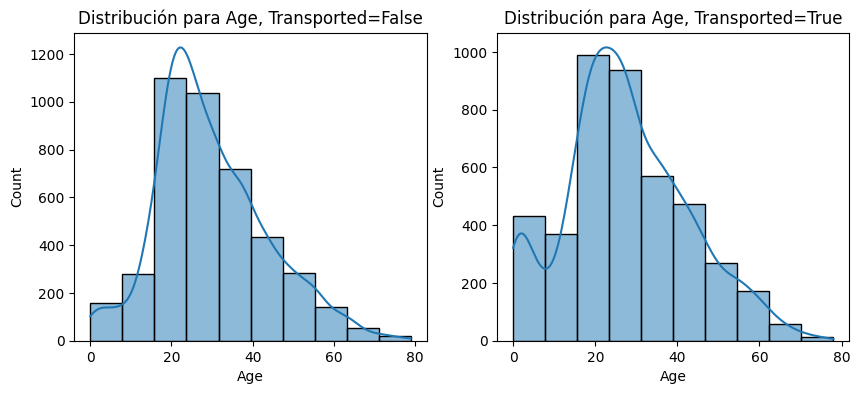

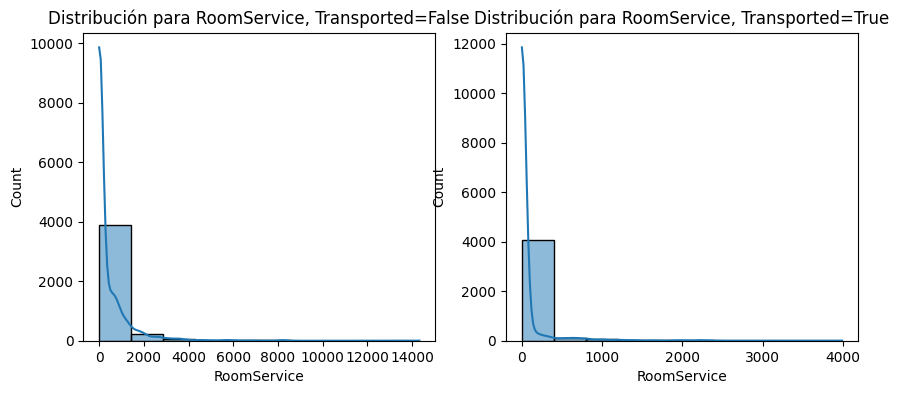

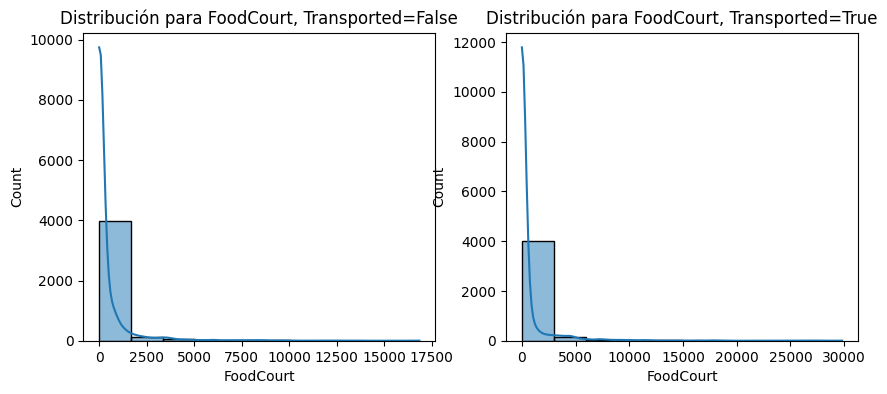

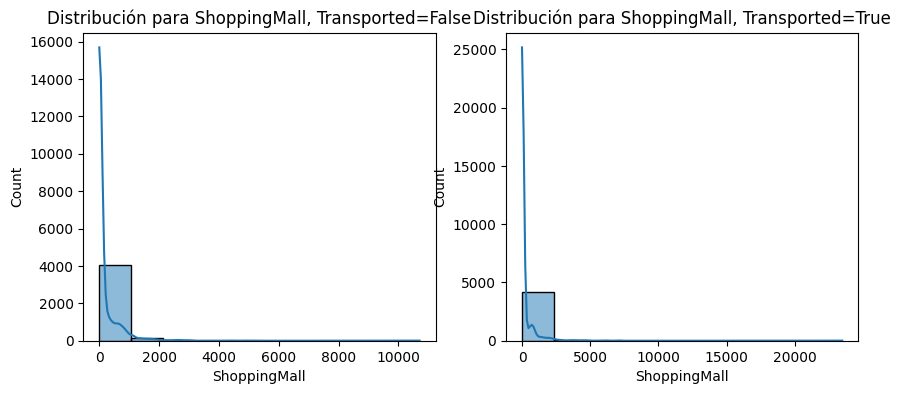

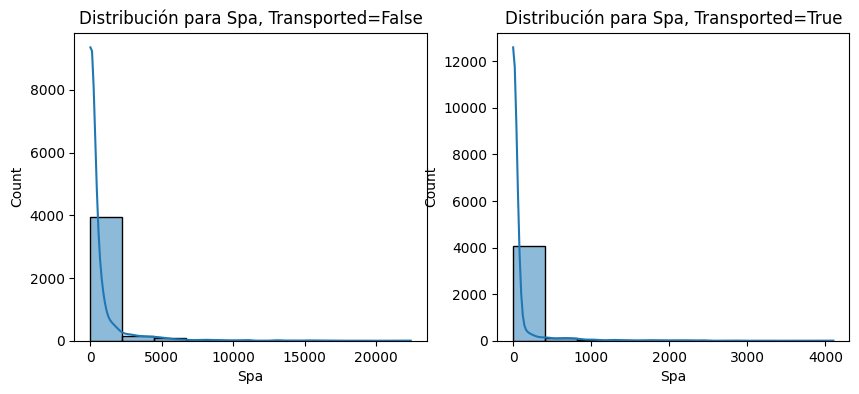

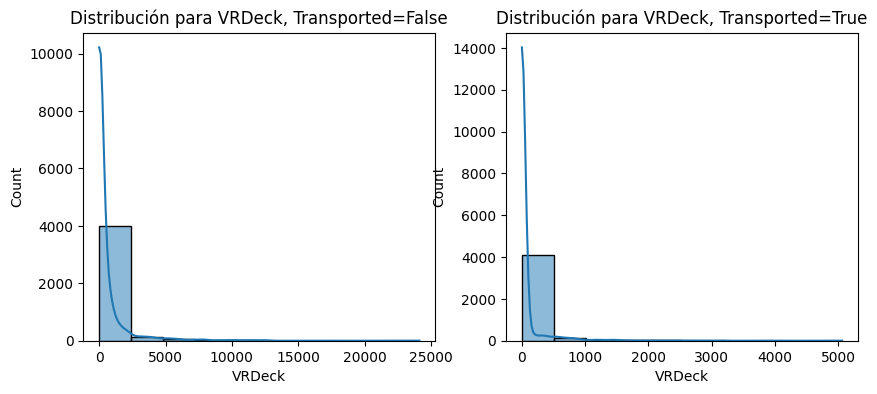

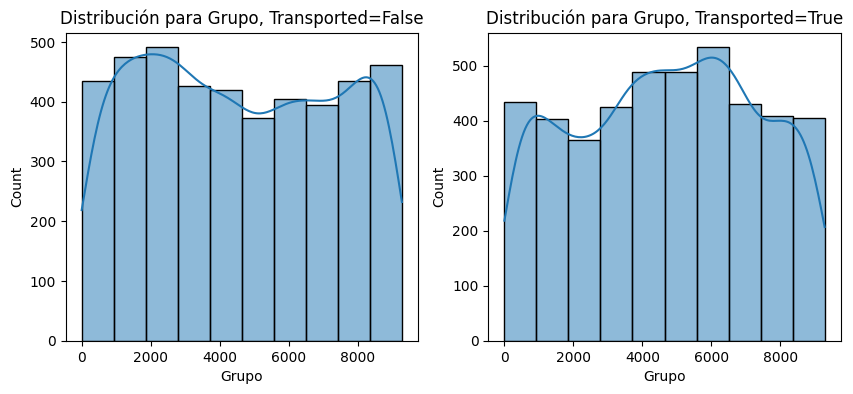

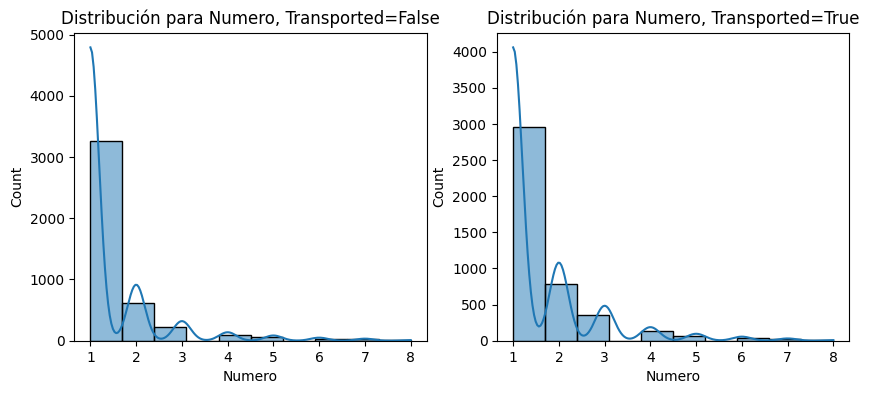

In [93]:
# Dispersión de los atributos numéricos por clase:
for col in num_train.columns.values:
    fig, ax = plt.subplots(figsize=(10, 4), ncols=2)

    # Gráfico para 'Transported' == False
    sns.histplot(x=train_set[col][train_set['Transported'] == False], kde=True, bins=10, ax=ax[0])
    ax[0].set_title(f'Distribución para {col}, Transported=False')

    # Gráfico para 'Transported' == True
    sns.histplot(x=train_set[col][train_set['Transported'] == True], kde=True, bins=10, ax=ax[1])
    ax[1].set_title(f'Distribución para {col}, Transported=True')

    plt.show()

**Comentario:** En base a la visualización:
- **Age:** No se observa una diferencia significativa de su distribución entre las clases.
- **RoomService:** Toma valores distintivamente más altos para la clase transportada.
- **FoodCourt:** No se observa una diferencia significativa de su distribución entre las clases.
- **ShoppingMall:** Toma valores más altos la clase transportada, o bien, posee una mayor varianza.
- **Spa:** Toma valores distintivamente más altos la clase no transportada.
- **VRDeck:** Toma valores más altos la clase no transportada.
- **Grupo:** Se observa que los valores medianos son más frecuentes para la clase transportada.
- **Numero**: Se observa una ligera diferencia de distribución.

Entonces, la única clase que no demuestra una relevancia sobre la clase es **Age**.

In [94]:
# Estadística descriptiva para las variables numéricas de la clase no transportada:
train_set[train_set['Transported'] == False].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Grupo,Numero
count,4226.000000,4217.000000,4231.000000,4221.000000,4223.000000,4225.000000,4315.000000,4315.000000
mean,29.922858,389.266066,382.615930,167.566217,564.382666,543.629822,4575.572422,1.447277
std,13.699262,875.638123,1200.115601,456.528126,1551.356047,1563.088368,2730.673652,1.012984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2182.500000,1.000000
50%,27.000000,1.000000,0.000000,0.000000,4.000000,1.000000,4462.000000,1.000000
75%,38.000000,473.000000,179.000000,95.000000,453.500000,388.000000,6997.000000,1.000000
max,79.000000,14327.000000,16856.000000,10705.000000,22408.000000,24133.000000,9280.000000,8.000000


In [95]:
# Estadística descriptiva para las variables numéricas de la clase no transportada:
train_set[train_set['Transported'] == True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Grupo,Numero
count,4288.000000,4295.000000,4279.000000,4264.000000,4287.000000,4280.000000,4378.000000,4378.000000
mean,27.748834,63.098021,532.691984,179.829972,61.675531,69.148131,4690.374829,1.587254
std,15.151705,274.812497,1931.306995,722.026714,262.682871,291.658171,2609.968480,1.089041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2544.750000,1.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4781.000000,1.000000
75%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6783.000000,2.000000
max,78.000000,3992.000000,29813.000000,23492.000000,4103.000000,5063.000000,9280.000000,8.000000


**Comentario:** Observando principalmente la media, se reafirma lo observado en la visualización. Las variables más relevantes serían **Spa, RoomService y VRDeck**.

In [96]:
# Sustitución de datos nulos con la desviación estándar
# (para mantener la variabilidad de cada atributo):
num_train.fillna(num_train.std(), inplace=True)
num_train.isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Grupo           0
Numero          0
dtype: int64

In [97]:
# Escalar atributos numéricos con MinMaxScaler, para mantener la distribución de los datos.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_train_scaled = scaler.fit_transform(num_train)
num_train_scaled = pd.DataFrame(num_train_scaled, columns=num_train.columns, index = X_train.index)
print('Datos numéricos estandarizados:')
display(num_train_scaled.head())

Datos numéricos estandarizados:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Grupo,Numero
PassengerId,,,,,,,,
1564_01,0.291139,0.000000,0.000000,0.000000,0.000000,0.00000,0.168463,0.000000
8012_01,0.303797,0.000000,0.000000,0.000000,0.000000,0.00000,0.863440,0.000000
1918_02,0.658228,0.000000,0.000000,0.000000,0.000000,0.00000,0.206618,0.142857
8346_01,0.183501,0.002862,0.000771,0.002682,0.000000,0.02681,0.899440,0.000000
1017_01,0.253165,0.000000,0.000503,0.005193,0.050205,0.00000,0.109506,0.000000


In [98]:
# Medición de la puntuación Fisher-score:
from sklearn.feature_selection import f_classif

scores = []
for col in num_train.columns.values:
  x = num_train_scaled[col].values.reshape(-1, 1)
  score = f_classif(x, y_train)[0][0]
  scores.append(score)

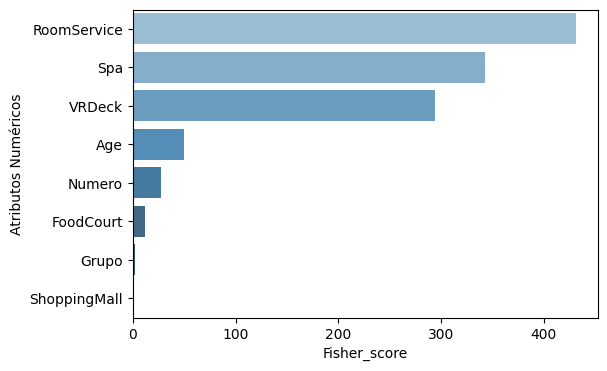

In [99]:
fig, axes = plt.subplots(figsize=(6,4), nrows=1, ncols=1)
plot_data = pd.DataFrame({'Atributos Numéricos': num_train.columns.values, 'Fisher_score': scores})
plot_data = plot_data.sort_values(by='Fisher_score', ascending=False)
p = sns.barplot(data=plot_data, x='Fisher_score', y='Atributos Numéricos', palette="Blues_d",ax=axes)
plt.show()

**Comentario:** De acuerdo al análisis estadístico anterior y los resultados de las puntuaciones Fisher-score, **eliminaremos las variables 'Age', 'FoodCourt', 'ShoppingMall', 'Grupo' y 'Numero'.**


**Comentario:** La desventaja de recortar variables en base a la puntuación Fisher-score es que se trata de un método de filtrado **individual**, es decir, no tiene la capacidad de detectar redundancias ni complementariedades entre atributos.

In [100]:
# Recorte de variables menos relevantes:
num_train2 = num_train_scaled.copy() # En caso de querer utilizar todas las variables numéricas
num_train_preproc = num_train_scaled.drop(['Age', 'FoodCourt', 'ShoppingMall', 'Grupo', 'Numero'], axis = 1)
display(num_train_preproc.head())

,RoomService,Spa,VRDeck
PassengerId,,,
1564_01,0.000000,0.000000,0.00000
8012_01,0.000000,0.000000,0.00000
1918_02,0.000000,0.000000,0.00000
8346_01,0.002862,0.000000,0.02681
1017_01,0.000000,0.050205,0.00000


In [101]:
# Dataframe con variables categóricas:
cat_train = X_train.select_dtypes(include=['object'])
cat_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
PassengerId,,,,,,
1564_01,Mars,True,F/303/S,TRAPPIST-1e,False,Weers Merie
8012_01,Mars,True,F/1531/S,TRAPPIST-1e,False,Camonk Bache
1918_02,Europa,True,A/23/S,TRAPPIST-1e,False,Sheleb Assibler
8346_01,Earth,False,F/1718/P,TRAPPIST-1e,False,Stelle Woodwinez
1017_01,Earth,False,F/190/S,TRAPPIST-1e,False,Joya Blanglison


In [102]:
cat_train.nunique()

HomePlanet        3
CryoSleep         2
Cabin          5464
Destination       3
VIP               2
Name           6780
dtype: int64

In [103]:
cat_train['Cabin'].unique()

array(['F/303/S', 'F/1531/S', 'A/23/S', ..., 'G/428/S', 'F/1453/P',
       'E/514/S'], dtype=object)

**Comentario:** La variable 'Name' es muy específica, por ende, la eliminaremos. La variable 'Cabin' posee el mismo problema, pero a partir de ella podemos definir nuevas variables que pueden resultar relevantes.

In [104]:
cat_train = cat_train.drop('Name', axis = 1)
cat_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
PassengerId,,,,,
1564_01,Mars,True,F/303/S,TRAPPIST-1e,False
8012_01,Mars,True,F/1531/S,TRAPPIST-1e,False
1918_02,Europa,True,A/23/S,TRAPPIST-1e,False
8346_01,Earth,False,F/1718/P,TRAPPIST-1e,False
1017_01,Earth,False,F/190/S,TRAPPIST-1e,False


In [105]:
cat_train[['Cabin1', 'Cabin2', 'Cabin3']] = cat_train['Cabin'].str.split('/', expand=True)
cat_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Cabin1,Cabin2,Cabin3
PassengerId,,,,,,,,
1564_01,Mars,True,F/303/S,TRAPPIST-1e,False,F,303,S
8012_01,Mars,True,F/1531/S,TRAPPIST-1e,False,F,1531,S
1918_02,Europa,True,A/23/S,TRAPPIST-1e,False,A,23,S
8346_01,Earth,False,F/1718/P,TRAPPIST-1e,False,F,1718,P
1017_01,Earth,False,F/190/S,TRAPPIST-1e,False,F,190,S


In [106]:
cat_train[['Cabin1', 'Cabin2', 'Cabin3']].nunique()

Cabin1       8
Cabin2    1756
Cabin3       2
dtype: int64

In [107]:
# Eliminar columna 'Cabin' y 'Cabin2', ya que son muy específicas:
cat_train = cat_train.drop(['Cabin', 'Cabin2'], axis = 1)
cat_train.head()

,HomePlanet,CryoSleep,Destination,VIP,Cabin1,Cabin3
PassengerId,,,,,,
1564_01,Mars,True,TRAPPIST-1e,False,F,S
8012_01,Mars,True,TRAPPIST-1e,False,F,S
1918_02,Europa,True,TRAPPIST-1e,False,A,S
8346_01,Earth,False,TRAPPIST-1e,False,F,P
1017_01,Earth,False,TRAPPIST-1e,False,F,S


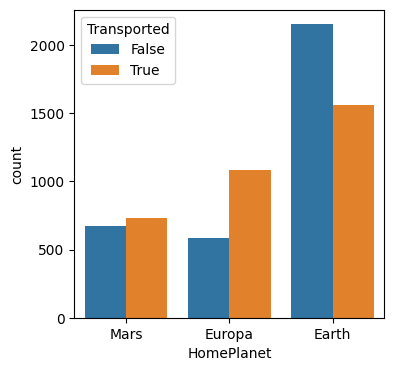

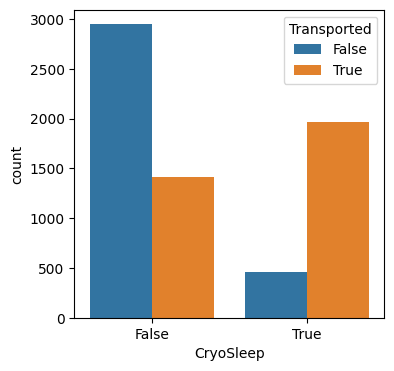

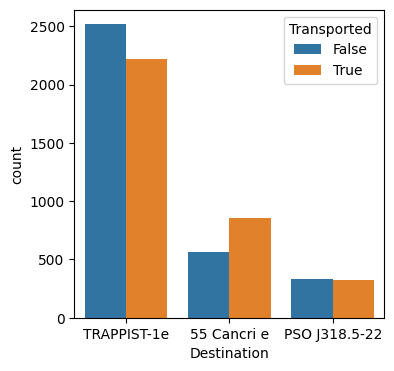

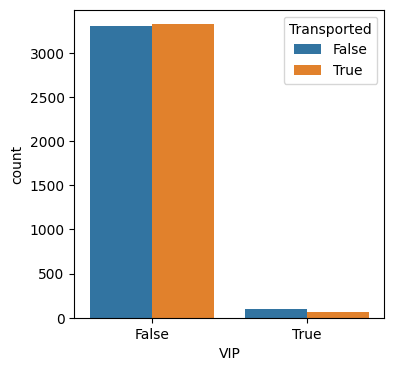

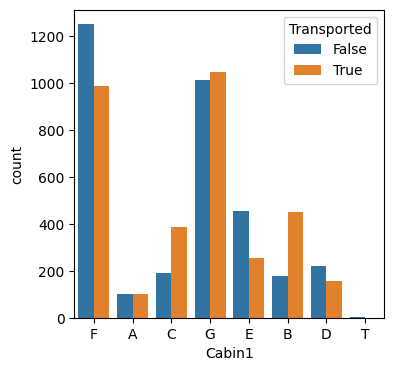

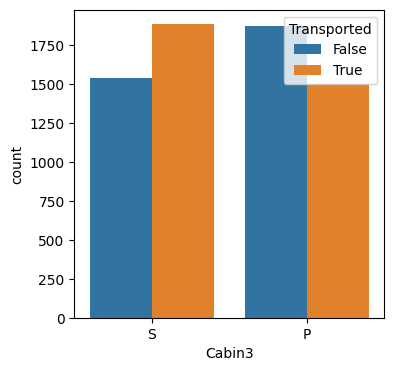

In [108]:
# Dispersión de los atributos categóricos por clase:
cat_train2 = cat_train.copy()
cat_train2['Transported'] = train_set['Transported']
for col in cat_train.columns.values:
    fig = plt.figure(figsize=(4, 4))

    sns.countplot(x=cat_train2[col], hue=cat_train2['Transported'])
    ax[0].set_title(f'Distribución para {col}')

    plt.show()

**Comentario:** En base a lo que se puede distinguir de la visualización, los atributos 'CryoSleep', 'HomePlanet', 'Cabin1' y 'Cabin3' resultan más relevantes.

In [109]:
# Conteo de datos nulos:
cat_train.isnull().sum()

HomePlanet     162
CryoSleep      169
Destination    144
VIP            158
Cabin1         164
Cabin3         164
dtype: int64

In [110]:
# Reemplazar datos nulos:
cat_train.fillna(cat_train.mode().iloc[0], inplace=True)
cat_train.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Cabin1         0
Cabin3         0
dtype: int64

In [111]:
from sklearn.feature_selection import mutual_info_classif as mi
from sklearn.preprocessing import LabelEncoder

scores = []
for col in cat_train.columns.values:
  x = LabelEncoder().fit_transform(cat_train[col]).reshape(-1,1)
  score = mi(x, y_train, discrete_features=True)[0]
  scores.append(score)

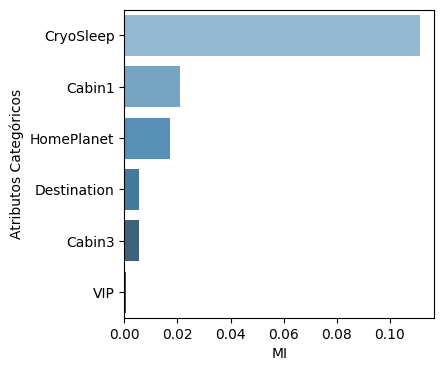

In [112]:
fig, axes = plt.subplots(figsize=(4,4), nrows=1, ncols=1)
plot_data = pd.DataFrame({'Atributos Categóricos': cat_train.columns.values, 'MI': scores})
plot_data = plot_data.sort_values(by='MI', ascending=False)
p = sns.barplot(data=plot_data,x='MI', y='Atributos Categóricos', palette="Blues_d",ax=axes)
plt.show()

**Comentario:** En base al criterio de la información mutua, junto a lo observado en los gráficos, **eliminaremos las 3 últimas variables: 'Destination', 'Cabin3' y 'VIP'.**

In [113]:
# Eliminar variables categóricas menos relevantes: 'Destination', 'Cabin3', 'VIP':
cat_train2 = cat_train.copy()
cat_train = cat_train.drop(['Destination', 'Cabin3', 'VIP'], axis = 1)
cat_train.head()

,HomePlanet,CryoSleep,Cabin1
PassengerId,,,
1564_01,Mars,True,F
8012_01,Mars,True,F
1918_02,Europa,True,A
8346_01,Earth,False,F
1017_01,Earth,False,F


In [114]:
# Codificación de variables categóricas:
cat_train['CryoSleep'] = cat_train['CryoSleep'].astype(int)
cat_train_preproc = pd.get_dummies(cat_train)
cat_train_preproc

,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T
PassengerId,,,,,,,,,,,,
1564_01,1,0,0,1,0,0,0,0,0,1,0,0
8012_01,1,0,0,1,0,0,0,0,0,1,0,0
1918_02,1,0,1,0,1,0,0,0,0,0,0,0
8346_01,0,1,0,0,0,0,0,0,0,1,0,0
1017_01,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1165_02,0,0,1,0,0,1,0,0,0,0,0,0
2701_01,1,1,0,0,0,0,0,0,0,0,1,0
6997_02,0,0,0,1,0,0,0,0,0,1,0,0


In [115]:
# Construir X_train:
X_train = pd.concat([num_train_preproc, cat_train_preproc], axis = 1)
X_train.head()

,RoomService,Spa,VRDeck,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T
PassengerId,,,,,,,,,,,,,,,
1564_01,0.000000,0.000000,0.00000,1,0,0,1,0,0,0,0,0,1,0,0
8012_01,0.000000,0.000000,0.00000,1,0,0,1,0,0,0,0,0,1,0,0
1918_02,0.000000,0.000000,0.00000,1,0,1,0,1,0,0,0,0,0,0,0
8346_01,0.002862,0.000000,0.02681,0,1,0,0,0,0,0,0,0,1,0,0
1017_01,0.000000,0.050205,0.00000,0,1,0,0,0,0,0,0,0,1,0,0


In [116]:
# Codificar Target:
y_train = y_train.astype(int)
y_train

PassengerId
1564_01    0
8012_01    1
1918_02    1
8346_01    0
1017_01    0
          ..
1165_02    0
2701_01    1
6997_02    0
2760_03    1
7850_01    0
Name: Transported, Length: 6954, dtype: int64

## Selección de Modelo

In [117]:
# Modelos:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

lr = LogisticRegression()
rfc = RandomForestClassifier(criterion= 'entropy')
svc = SVC()
dtc = DecisionTreeClassifier()

### Grid Search: Logistic Regression

In [118]:
# Parámetros:
param_grid_lr = {'C': np.logspace(-3,4, 8).tolist()}

# Aplicar greed search:
gs_lr = GridSearchCV(estimator = lr,
                     param_grid = param_grid_lr,
                     scoring = 'accuracy',
                     cv = 5,
                     n_jobs = -1)

gs_lr = gs_lr.fit(X_train, y_train)

# Imprimir resultados:
print(gs_lr.best_score_)
print(gs_lr.best_params_)

0.7748054554199918
{'C': 1000.0}


### Grid Search:  Random Forest Classifier


In [119]:
# Parámetros:
param_grid_rfc = {'n_estimators': [50, 100, 200],
                  'max_depth': [None, 10, 20, 30, 40, 50]}

# Aplicar greed search:
gs_rfc = GridSearchCV(estimator = rfc,
                      param_grid = param_grid_rfc,
                      scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)

gs_rfc = gs_rfc.fit(X_train, y_train)

# Imprimir resultados:
print(gs_rfc.best_score_)
print(gs_rfc.best_params_)

0.7891876347951113
{'max_depth': 10, 'n_estimators': 200}


### Grid Search: Decision Tree Classifier

In [120]:
# Parámetros:
param_grid_dtc = {'max_depth': [3, 5, 7],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['auto', 'sqrt', 'log2'],
                'criterion': ['gini', 'entropy']
                }

# Aplicar greed search:
gs_dtc = GridSearchCV(estimator = dtc,
                      param_grid = param_grid_dtc,
                      scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)

gs_dtc = gs_dtc.fit(X_train, y_train)

# Imprimir resultados:
print(gs_dtc.best_score_)
print(gs_dtc.best_params_)

0.7612905161133494
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}


### Grid Search: SVC

In [121]:
# Parámetros:
param_grid_svc = {'C': np.logspace(-1,2, 3).tolist(),
                  'kernel': ['linear', 'rbf', 'poly']}

# Aplicar greed search:
gs_svc = GridSearchCV(estimator = svc,
                      param_grid = param_grid_svc,
                      scoring = 'accuracy',
                      cv = 5,
                      n_jobs = -1)

gs_svc = gs_svc.fit(X_train, y_train)

# Imprimir resultados:
print(gs_svc.best_score_)
print(gs_svc.best_params_)

0.7658910053840463
{'C': 100.0, 'kernel': 'rbf'}


**Comentario:** En base a los resultados, el mejor modelo es **RandomForestClassifier('max_depth': 10, 'n_estimators': 100)**, con un accuracy de **0.79**

### Tratamiento Datos de Prueba (split)


In [122]:
# Dataframe de atributos numéricos del X_test:
num_test = X_test[['RoomService', 'Spa', 'VRDeck']]
num_test.head()

,RoomService,Spa,VRDeck
PassengerId,,,
6252_01,630.0,312.0,0.0
5939_01,628.0,0.0,126.0
1760_01,742.0,26.0,4.0
8383_07,0.0,0.0,0.0
8147_03,18.0,356.0,57.0


In [123]:
# Conteo de datos nulos:
num_test.isnull().sum()

RoomService    44
Spa            44
VRDeck         46
dtype: int64

In [124]:
# Sustitución de datos nulos con la desviación estándar:
num_test.fillna(num_test.std(), inplace=True)
num_test.isnull().sum()

RoomService    0
Spa            0
VRDeck         0
dtype: int64

In [125]:
# Escalamiento de los datos:
scaler = MinMaxScaler()
num_test_scaled = scaler.fit_transform(num_test)
num_test_preproc = pd.DataFrame(num_test_scaled, columns = num_test.columns, index = X_test.index)
num_test_preproc.head()

,RoomService,Spa,VRDeck
PassengerId,,,
6252_01,0.111524,0.022294,0.000000
5939_01,0.111170,0.000000,0.010168
1760_01,0.131351,0.001858,0.000323
8383_07,0.000000,0.000000,0.000000
8147_03,0.003186,0.025438,0.004600


In [126]:
# Dataframe con atributos categóricos de X_train:
cat_test = X_test[['CryoSleep', 'Cabin', 'HomePlanet']]
cat_test.head()

,CryoSleep,Cabin,HomePlanet
PassengerId,,,
6252_01,False,F/1201/S,Mars
5939_01,False,E/385/S,NaN
1760_01,False,F/336/S,Earth
8383_07,False,G/1368/P,Earth
8147_03,False,G/1317/P,Earth


In [127]:
# Tratamiento del atributo 'Cabin':
cat_test[['Cabin1', 'Cabin2', 'Cabin3']] = cat_test['Cabin'].str.split('/', expand=True)
cat_test = cat_test.drop(['Cabin', 'Cabin2', 'Cabin3'], axis=1)
cat_test.head()

,CryoSleep,HomePlanet,Cabin1
PassengerId,,,
6252_01,False,Mars,F
5939_01,False,NaN,E
1760_01,False,Earth,F
8383_07,False,Earth,G
8147_03,False,Earth,G


In [128]:
# Conteo de datos nulos:
cat_test.isnull().sum()

CryoSleep     48
HomePlanet    39
Cabin1        35
dtype: int64

In [129]:
# Sustitución de datos nulos por la moda:
cat_test.fillna(cat_test.mode().iloc[0], inplace=True)
cat_test.isnull().sum()

CryoSleep     0
HomePlanet    0
Cabin1        0
dtype: int64

In [130]:
# Tratamiento atributo 'CryoSleep':
cat_test['CryoSleep'] = cat_test['CryoSleep'].astype(int)

In [131]:
cat_test_preproc = pd.get_dummies(cat_test)
cat_test_preproc.head()

,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T
PassengerId,,,,,,,,,,,,
6252_01,0,0,0,1,0,0,0,0,0,1,0,0
5939_01,0,1,0,0,0,0,0,0,1,0,0,0
1760_01,0,1,0,0,0,0,0,0,0,1,0,0
8383_07,0,1,0,0,0,0,0,0,0,0,1,0
8147_03,0,1,0,0,0,0,0,0,0,0,1,0


In [132]:
X_test = pd.concat([num_test_preproc, cat_test_preproc], axis=1)
X_test.head()

,RoomService,Spa,VRDeck,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T
PassengerId,,,,,,,,,,,,,,,
6252_01,0.111524,0.022294,0.000000,0,0,0,1,0,0,0,0,0,1,0,0
5939_01,0.111170,0.000000,0.010168,0,1,0,0,0,0,0,0,1,0,0,0
1760_01,0.131351,0.001858,0.000323,0,1,0,0,0,0,0,0,0,1,0,0
8383_07,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,1,0
8147_03,0.003186,0.025438,0.004600,0,1,0,0,0,0,0,0,0,0,1,0


## Métricas y Análisis de Resultados

In [133]:
mejor_modelo = gs_rfc.best_estimator_
mejor_modelo.fit(X_train, y_train)
y_pred = mejor_modelo.predict(X_test)

In [134]:
# Métricas:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test.values, y_pred)
precision = precision_score(y_test.values, y_pred)
recall = recall_score(y_test.values, y_pred)
f1 = f1_score(y_test.values, y_pred)


print('Metricas:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}\n')

Metricas:
Accuracy: 0.7821
Precision: 0.8100
Recall: 0.7629
F1 Score: 0.7858



**Comentarios:** Se observan buenos resultados para todas las métricas que miden los distintos tipos de errores.


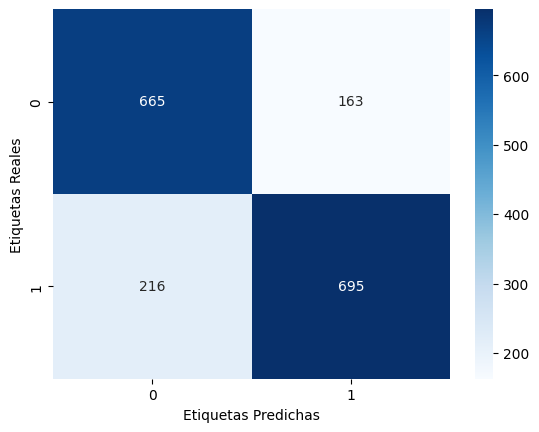

In [135]:
# Matriz de confusión:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

**Comentario:** Por medio de la matriz de confusión podemos visualizar el comportamiento del modelo. Se observa que el modelo en la mayoría de los casos predice correctamente. También, se ve que el modelo tiende a no cometer más un tipo de error.

## Procesamiento de Datos de Prueba - Kaggle:

In [136]:
test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [137]:
print('Cantidad de datos de prueba: ', len(test_set))
print('Cantidad de Id\'s de pasajeros distintos: ', test_set['PassengerId'].nunique())

Cantidad de datos de prueba:  4277
Cantidad de Id's de pasajeros distintos:  4277


In [138]:
test_set = test_set.set_index('PassengerId')

In [139]:
# Dataframe de atributos numéricos del X_train:
num_test = test_set[['RoomService', 'Spa', 'VRDeck']]
num_test.head()

,RoomService,Spa,VRDeck
PassengerId,,,
0013_01,0.0,0.0,0.0
0018_01,0.0,2823.0,0.0
0019_01,0.0,0.0,0.0
0021_01,0.0,181.0,585.0
0023_01,10.0,0.0,0.0


In [140]:
# Conteo de datos nulos:
num_test.isnull().sum()

RoomService     82
Spa            101
VRDeck          80
dtype: int64

In [141]:
# Sustitución de datos nulos con la desviación estándar:
num_test.fillna(num_test.std(), inplace=True)
num_test.isnull().sum()

RoomService    0
Spa            0
VRDeck         0
dtype: int64

In [142]:
# Escalamiento de los datos:
scaler = MinMaxScaler()
num_test_scaled = scaler.fit_transform(num_test)
num_test_preproc = pd.DataFrame(num_test_scaled, columns = num_test.columns, index = test_set.index)
num_test_preproc.head()

,RoomService,Spa,VRDeck
PassengerId,,,
0013_01,0.000000,0.000000,0.000000
0018_01,0.000000,0.142260,0.000000
0019_01,0.000000,0.000000,0.000000
0021_01,0.000000,0.009121,0.026266
0023_01,0.000865,0.000000,0.000000


In [143]:
# Dataframe con atributos categóricos de X_train:
cat_test = test_set[['CryoSleep', 'Cabin', 'HomePlanet']]
cat_test.head()

,CryoSleep,Cabin,HomePlanet
PassengerId,,,
0013_01,True,G/3/S,Earth
0018_01,False,F/4/S,Earth
0019_01,True,C/0/S,Europa
0021_01,False,C/1/S,Europa
0023_01,False,F/5/S,Earth


In [144]:
# Tratamiento del atributo 'Cabin':
cat_test[['Cabin1', 'Cabin2', 'Cabin3']] = cat_test['Cabin'].str.split('/', expand=True)
cat_test = cat_test.drop(['Cabin', 'Cabin2', 'Cabin3'], axis=1)
cat_test.head()

,CryoSleep,HomePlanet,Cabin1
PassengerId,,,
0013_01,True,Earth,G
0018_01,False,Earth,F
0019_01,True,Europa,C
0021_01,False,Europa,C
0023_01,False,Earth,F


In [145]:
# Conteo de datos nulos:
cat_test.isnull().sum()

CryoSleep      93
HomePlanet     87
Cabin1        100
dtype: int64

In [146]:
# Sustitución de datos nulos por la moda:
cat_test.fillna(cat_test.mode().iloc[0], inplace=True)
cat_test.isnull().sum()

CryoSleep     0
HomePlanet    0
Cabin1        0
dtype: int64

In [147]:
# Tratamiento atributo 'CryoSleep':
cat_test['CryoSleep'] = cat_test['CryoSleep'].astype(int)

In [148]:
cat_test_preproc = pd.get_dummies(cat_test)
cat_test_preproc.head()

,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T
PassengerId,,,,,,,,,,,,
0013_01,1,1,0,0,0,0,0,0,0,0,1,0
0018_01,0,1,0,0,0,0,0,0,0,1,0,0
0019_01,1,0,1,0,0,0,1,0,0,0,0,0
0021_01,0,0,1,0,0,0,1,0,0,0,0,0
0023_01,0,1,0,0,0,0,0,0,0,1,0,0


In [149]:
X_test_set = pd.concat([num_test_preproc, cat_test_preproc], axis=1)
X_test_set.head()

,RoomService,Spa,VRDeck,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin1_A,Cabin1_B,Cabin1_C,Cabin1_D,Cabin1_E,Cabin1_F,Cabin1_G,Cabin1_T
PassengerId,,,,,,,,,,,,,,,
0013_01,0.000000,0.000000,0.000000,1,1,0,0,0,0,0,0,0,0,1,0
0018_01,0.000000,0.142260,0.000000,0,1,0,0,0,0,0,0,0,1,0,0
0019_01,0.000000,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,0,0
0021_01,0.000000,0.009121,0.026266,0,0,1,0,0,0,1,0,0,0,0,0
0023_01,0.000865,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0


## Resultados Kaggle

In [150]:
mejor_modelo = gs_rfc.best_estimator_
mejor_modelo.fit(X_train, y_train)
y_kaggle = mejor_modelo.predict(X_test_set)

### CSV Kaggle

In [151]:
data = pd.DataFrame(y_kaggle, index = X_test_set.index)
data.rename(columns = {0 : 'Transported'}, inplace = True)
data = data.reset_index()
data['Transported'] = data['Transported'].astype(bool)
data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [152]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
path = '/content/drive/MyDrive/data_sets'

In [154]:
csv_file_path = os.path.join(path, 'submission_space_titanic.csv')
data.to_csv(csv_file_path, index=False)

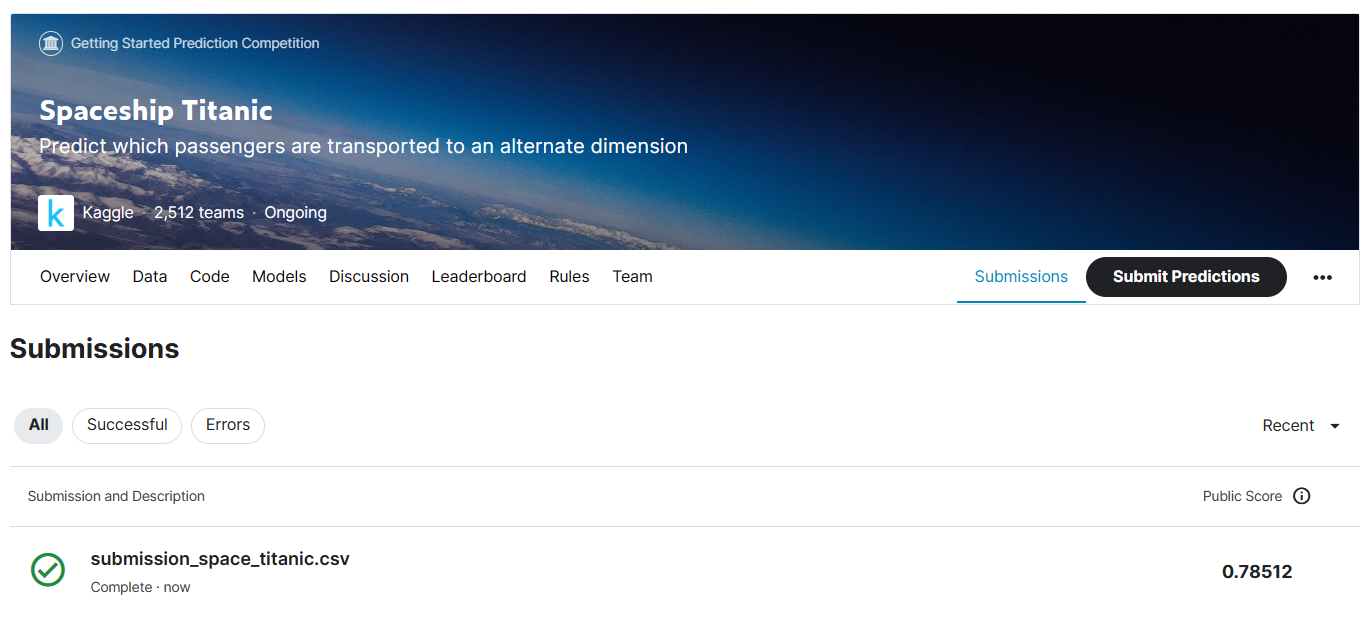

**Comentario:** Se obtuvo un accuracy de **0.78512**, similar al del conjunto de pruebas obtenido a partir de un split sobre los datos de entrenamiento: **0.79**.